# Stepik data

<font color='orange'> Still waiting for some good data... </font>

## Init

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [3]:
import entity
import seaborn as sns

from utils import examine_df
from sklearn.datasets.lfw import Bunch
from raw_preprocessor import RawPreprocessor

In [4]:
%matplotlib inline
sns.set_style('darkgrid')

In [5]:
args = Bunch()

## Make a few samples

In [6]:
raw_samples = [
    {
        'text': '''There are two horses on a chess board and four coordintes x1, y1, x2, y2 are typed in. Determine, whether they can hit each other or not. 

INPUT

Four integer coordinates in the following sequence: x1,y1,x2,y2. The coordinates are not the same.

OUTPUT

"YES" (uppercase), if they hit each other and "NO" if they don't.''',
        'tags': ['python', 'easy']
    },
    {
        'text': '''Fizz Buzz is a classic programming problem. Here is its slightly modified version.

Write a program that takes the input of two integers: the beginning and the end of the interval (both numbers belong to the interval).

The program should output the numbers from this interval, but if the number is divisible by 3, you should output Fizz instead of it, if the number is divisible by 5 - output Buzz, and if it is divisible both by 3 and by 5 - output FizzBuzz.

Output each number or the word on a separate line.''',
        'tags': ['python', 'medium']
    },
    {
        'text': '''Find the number of "Ds", "Cs", "Bs" and "As" for the last test on informatics in the class consisting of n students. The program gets number n as input, and then gets the grades themselves (one by one). The program should output four numbers in a single line - the number of "D", the number of "C", the number of "B" and the number of "A" grades.''',
        'tags': ['python', 'hard']
    },
    {
        'text': '''Sum all input numbers in one pass func.'''
    },
    {
        'text': '''You are given a string s consisting of n lowercase Latin letters.

Let's denote k-substring of s as a string subsk = sksk + 1..sn + 1 - k. Obviously, subs1 = s, and there are exactly  such substrings.

Let's call some string t an odd proper suprefix of a string T iff the following conditions are met:

|T| > |t|;
|t| is an odd number;
t is simultaneously a prefix and a suffix of T.
For evey k-substring () of s you have to calculate the maximum length of its odd proper suprefix.

Input
The first line contains one integer n (2 ≤ n ≤ 106) — the length s.

The second line contains the string s consisting of n lowercase Latin letters.

Output
Print  integers. i-th of them should be equal to maximum length of an odd proper suprefix of i-substring of s (or  - 1, if there is no such string that is an odd proper suprefix of i-substring).'''
    }
]

In [7]:
preprocessor = RawPreprocessor()
df = preprocessor.fit_transform(raw_samples)
examine_df(df, exclude='tail, math')

shape=(5, 2)


name                                                        text  \
pos                                                            0   
head 0         There are two horses on a chess board and four...   
     1         Fizz Buzz is a classic programming problem. He...   
     2         Find the number of "Ds", "Cs", "Bs" and "As" f...   
     3                   Sum all input numbers in one pass func.   
     4         You are given a string s consisting of n lower...   
meta type                                                 object   
     has_null                                              False   

name                    tags  
pos                        1  
head 0           easy python  
     1         medium python  
     2           hard python  
     3                   NaN  
     4                   NaN  
meta type             object  
     has_null          False

## Sanity check

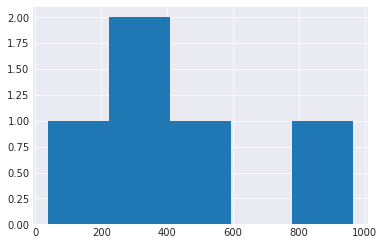

In [8]:
df.text.map(len).hist(bins=len(raw_samples));

In [9]:
df.text.sample(len(raw_samples)).tolist()

['Find the number of "Ds", "Cs", "Bs" and "As" for the last test on informatics in the class consisting of n students. The program gets number n as input, and then gets the grades themselves (one by one). The program should output four numbers in a single line - the number of "D", the number of "C", the number of "B" and the number of "A" grades.',
 'There are two horses on a chess board and four coordintes x1, y1, x2, y2 are typed in. Determine, whether they can hit each other or not. DCNL INPUT DCNL Four integer coordinates in the following sequence: x1,y1,x2,y2. The coordinates are not the same. DCNL OUTPUT DCNL "YES" (uppercase), if they hit each other and "NO" if they don\'t.',
 'Sum all input numbers in one pass func.',
 "You are given a string s consisting of n lowercase Latin letters. DCNL Let's denote k-substring of s as a string subsk NASC = NASC sksk NASC + NASC 1..sn NASC + NASC 1 NASC - NASC k. Obviously, subs1 NASC = NASC s, and there are exactly such substrings. DCNL Let

## Save

In [10]:
args.save_path = 'stepik_data.hdf5'

In [11]:
%time df.to_hdf(args.save_path, 'df', mode='w', format='f', complevel=9)

CPU times: user 52 ms, sys: 24 ms, total: 76 ms
Wall time: 86.5 ms


In [12]:
!du -sh $args.save_path

1.1M	stepik_data.hdf5


## End

In [13]:
args

{'save_path': 'stepik_data.hdf5'}